# PCA Analysis


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
pca_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\commodities\soft_commodities\grains\pca_grains\CBOT_DL_GRAIN, 1D.csv',index_col='time', parse_dates=True)

pca_df.head()

,"ZC1!, CBOT: Close","ZS1!, CBOT: Close","ZM1!, CBOT: Close","ZL1!, CBOT: Close","ZW1!, CBOT: Close"
time,,,,,
1970-01-05 01:00:00+00:00,120.375,251.250,74.1,8.67,145.375
1970-01-06 01:00:00+00:00,120.625,252.000,73.0,8.84,146.000
1970-01-07 01:00:00+00:00,121.125,253.250,73.2,9.18,146.875
1970-01-08 01:00:00+00:00,121.750,253.750,73.6,9.24,146.750
1970-01-09 01:00:00+00:00,120.875,253.375,74.0,9.25,145.625


# Exploratory Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

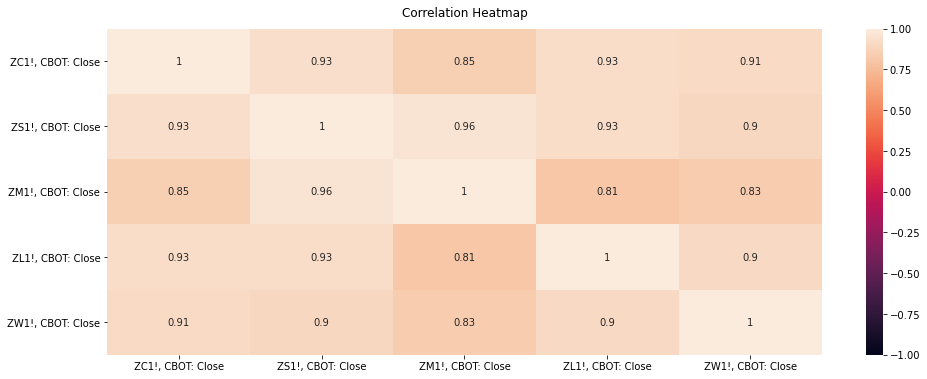

In [3]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(pca_df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

ZC1!, CBOT: Close


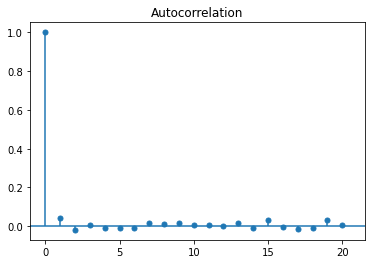

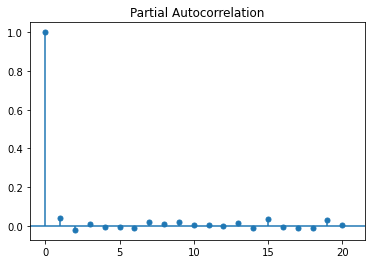

ZS1!, CBOT: Close


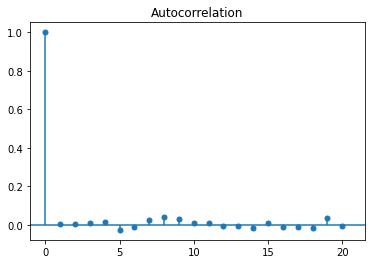

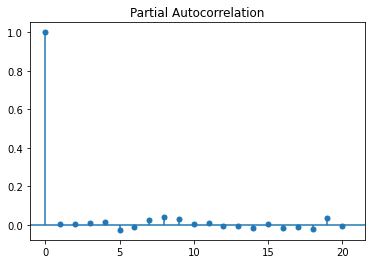

ZM1!, CBOT: Close


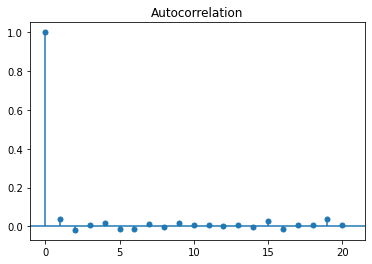

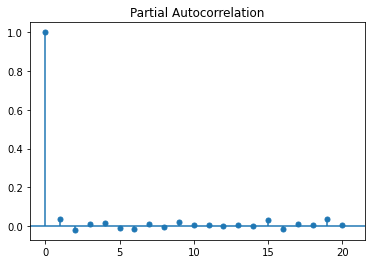

ZL1!, CBOT: Close


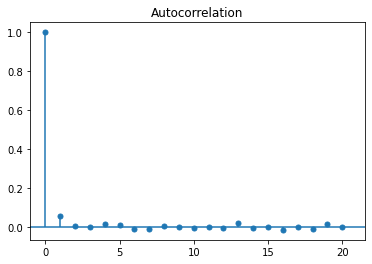

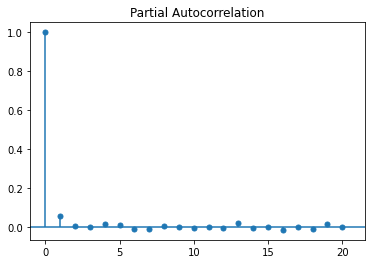

ZW1!, CBOT: Close


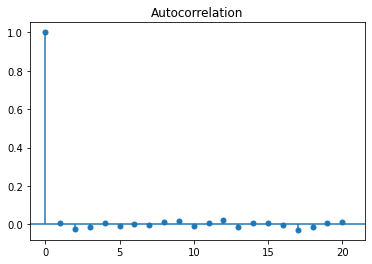

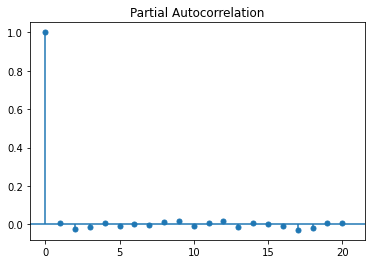

In [4]:
for column in pca_df.columns:
    print(column)
    plot_acf(np.log(pca_df[column]).diff(1).dropna(axis=0), alpha=1, lags=20)
    plot_pacf(np.log(pca_df[column]).diff(1).dropna(axis=0), alpha=1, lags=20)

    plt.show()

# PCA

In [5]:
from statsmodels.multivariate.pca import PCA

In [6]:
pca_logDiff_df = np.log(pca_df).diff(1).dropna(axis=0).fillna(0)


In [7]:
pc = PCA(pca_logDiff_df)

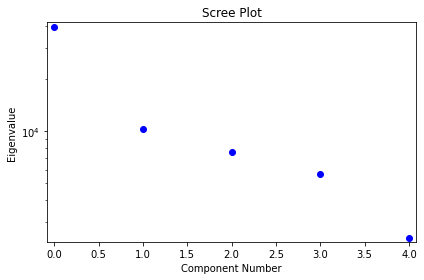

In [8]:
pc.plot_scree()
plt.show()

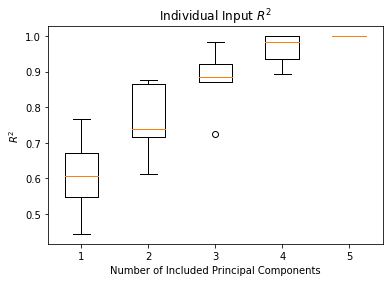

In [9]:
pc.plot_rsquare()
plt.show()

# Modelling Excercise

In [10]:
pca_event = {

    'nComp':4,

}

pca_logDiff_df = np.log(pca_df).diff(1).dropna(axis=0).fillna(0)
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

In [11]:
pca_logDiff_df = np.log(pca_df).diff(1).dropna(axis=0).fillna(0)
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

In [12]:
pc.factors

,comp_0,comp_1,comp_2,comp_3
time,,,,
1970-01-06 01:00:00+00:00,-0.001508,-0.000789,-0.015979,-0.001823
1970-01-07 01:00:00+00:00,-0.006990,0.004548,-0.018991,-0.000159
1970-01-08 01:00:00+00:00,-0.002408,0.001598,-0.000794,-0.002959
1970-01-09 01:00:00+00:00,0.001302,0.005648,0.001239,0.002264
1970-01-12 01:00:00+00:00,-0.005456,0.010797,-0.003896,-0.002959
...,...,...,...,...
2022-11-07 01:00:00+00:00,0.004434,-0.001666,0.003579,0.002550
2022-11-08 01:00:00+00:00,0.006721,0.008606,0.009624,0.000062
2022-11-09 01:00:00+00:00,0.002628,0.013088,-0.003603,-0.008281


In [13]:
pc.scores

,comp_0,comp_1,comp_2,comp_3
time,,,,
1970-01-06 01:00:00+00:00,-0.001508,-0.000789,-0.015979,-0.001823
1970-01-07 01:00:00+00:00,-0.006990,0.004548,-0.018991,-0.000159
1970-01-08 01:00:00+00:00,-0.002408,0.001598,-0.000794,-0.002959
1970-01-09 01:00:00+00:00,0.001302,0.005648,0.001239,0.002264
1970-01-12 01:00:00+00:00,-0.005456,0.010797,-0.003896,-0.002959
...,...,...,...,...
2022-11-07 01:00:00+00:00,0.004434,-0.001666,0.003579,0.002550
2022-11-08 01:00:00+00:00,0.006721,0.008606,0.009624,0.000062
2022-11-09 01:00:00+00:00,0.002628,0.013088,-0.003603,-0.008281


In [14]:
pc.loadings

,comp_0,comp_1,comp_2,comp_3
"ZC1!, CBOT: Close",-0.446707,-0.379107,0.115210,-0.801642
"ZS1!, CBOT: Close",-0.502744,0.377184,0.116458,0.145609
"ZM1!, CBOT: Close",-0.470671,0.291611,0.566177,0.184856
"ZL1!, CBOT: Close",-0.424263,0.292864,-0.802301,-0.028138
"ZW1!, CBOT: Close",-0.382323,-0.737024,-0.094451,0.548821


In [15]:
pc.coeff

,"ZC1!, CBOT: Close","ZS1!, CBOT: Close","ZM1!, CBOT: Close","ZL1!, CBOT: Close","ZW1!, CBOT: Close"
comp_0,-89.158298,-100.342676,-93.941097,-84.678553,-76.307861
comp_1,-38.310214,38.115869,29.468475,29.595069,-74.479133
comp_2,10.013565,10.122016,49.209623,-69.732421,-8.209221
comp_3,-60.106892,10.917704,13.860446,-2.109795,41.150483


In [16]:
pc.rsquare

ncomp
0    0.000000
1    0.606703
2    0.762230
3    0.877282
4    0.962904
Name: rsquare, dtype: float64

In [17]:
pc.projection

,"ZC1!, CBOT: Close","ZS1!, CBOT: Close","ZM1!, CBOT: Close","ZL1!, CBOT: Close","ZW1!, CBOT: Close"
time,,,,,
1970-01-06 01:00:00+00:00,0.001933,-0.000851,-0.011831,0.021007,0.004168
1970-01-07 01:00:00+00:00,0.004369,0.011236,-0.002392,0.035133,0.006176
1970-01-08 01:00:00+00:00,0.005237,0.004410,0.003462,0.005504,-0.000774
1970-01-09 01:00:00+00:00,-0.007080,0.002122,0.002484,-0.000411,-0.007581
1970-01-12 01:00:00+00:00,0.003473,0.014604,0.010447,0.018230,-0.008296
...,...,...,...,...,...
2022-11-07 01:00:00+00:00,-0.006966,-0.007112,-0.004256,-0.011413,-0.002326
2022-11-08 01:00:00+00:00,-0.013087,-0.003915,0.001797,-0.016628,-0.021555
2022-11-09 01:00:00+00:00,-0.004203,0.001899,-0.002517,0.007560,-0.026068


In [18]:
pc.eigenvals

0    39836.131528
1    10211.892324
2     7554.315528
3     5621.960230
Name: eigenvals, dtype: float64

In [19]:
pc.eigenvecs

,eigenvec_0,eigenvec_1,eigenvec_2,eigenvec_3
0,-0.446707,-0.379107,0.115210,-0.801642
1,-0.502744,0.377184,0.116458,0.145609
2,-0.470671,0.291611,0.566177,0.184856
3,-0.424263,0.292864,-0.802301,-0.028138
4,-0.382323,-0.737024,-0.094451,0.548821


In [20]:
pc.weights

array([1., 1., 1., 1., 1.])

In [21]:
pc.transformed_data

array([[ 0.12321123,  0.17455555, -0.8742745 ,  1.12916962,  0.23693654],
       [ 0.25369724,  0.29519732,  0.15109853,  2.20415098,  0.33261215],
       [ 0.31762835,  0.11273067,  0.30837112,  0.372116  , -0.05495456],
       ...,
       [-0.26965429,  0.22449682, -0.24292535,  0.38734711, -1.48310963],
       [-1.06529606, -1.24531244, -1.91202141,  0.41552373, -0.21819111],
       [ 0.42654128,  1.14436158,  0.46389933,  0.66454346,  0.71302873]])

In [22]:
pc.cols

array([0, 1, 2, 3, 4])

In [23]:
pc.rows

array([    0,     1,     2, ..., 13129, 13130, 13131])

In [24]:
pc.eigenvecs['eigenvec_0']

0   -0.446707
1   -0.502744
2   -0.470671
3   -0.424263
4   -0.382323
Name: eigenvec_0, dtype: float64

In [25]:
pc.eigenvecs['eigenvec_0'][0]

-0.4467074437269709

In [26]:
pc.factors

,comp_0,comp_1,comp_2,comp_3
time,,,,
1970-01-06 01:00:00+00:00,-0.001508,-0.000789,-0.015979,-0.001823
1970-01-07 01:00:00+00:00,-0.006990,0.004548,-0.018991,-0.000159
1970-01-08 01:00:00+00:00,-0.002408,0.001598,-0.000794,-0.002959
1970-01-09 01:00:00+00:00,0.001302,0.005648,0.001239,0.002264
1970-01-12 01:00:00+00:00,-0.005456,0.010797,-0.003896,-0.002959
...,...,...,...,...
2022-11-07 01:00:00+00:00,0.004434,-0.001666,0.003579,0.002550
2022-11-08 01:00:00+00:00,0.006721,0.008606,0.009624,0.000062
2022-11-09 01:00:00+00:00,0.002628,0.013088,-0.003603,-0.008281


In [27]:
cacheModels = {

    'nComps':4,

}
forecast=0
for i in range(0,cacheModels['nComps']):
    forecast+= pc.eigenvecs['eigenvec_'+str(i)][0]*pc.factors['comp_'+str(i)]


In [28]:
forecast

time
1970-01-06 01:00:00+00:00    0.000593
1970-01-07 01:00:00+00:00   -0.000662
1970-01-08 01:00:00+00:00    0.002750
1970-01-09 01:00:00+00:00   -0.004395
1970-01-12 01:00:00+00:00    0.000268
                               ...   
2022-11-07 01:00:00+00:00   -0.002981
2022-11-08 01:00:00+00:00   -0.005206
2022-11-09 01:00:00+00:00    0.000087
2022-11-10 01:00:00+00:00   -0.007206
2022-11-11 01:00:00+00:00   -0.000067
Name: comp_0, Length: 13132, dtype: float64

In [29]:
np.exp(forecast.cumsum())*pca_df['ZC1!, CBOT: Close'][0]

time
1970-01-06 01:00:00+00:00    120.446459
1970-01-07 01:00:00+00:00    120.366743
1970-01-08 01:00:00+00:00    120.698193
1970-01-09 01:00:00+00:00    120.168851
1970-01-12 01:00:00+00:00    120.201033
                                ...    
2022-11-07 01:00:00+00:00    121.875922
2022-11-08 01:00:00+00:00    121.243081
2022-11-09 01:00:00+00:00    121.253685
2022-11-10 01:00:00+00:00    120.383114
2022-11-11 01:00:00+00:00    120.375000
Name: comp_0, Length: 13132, dtype: float64

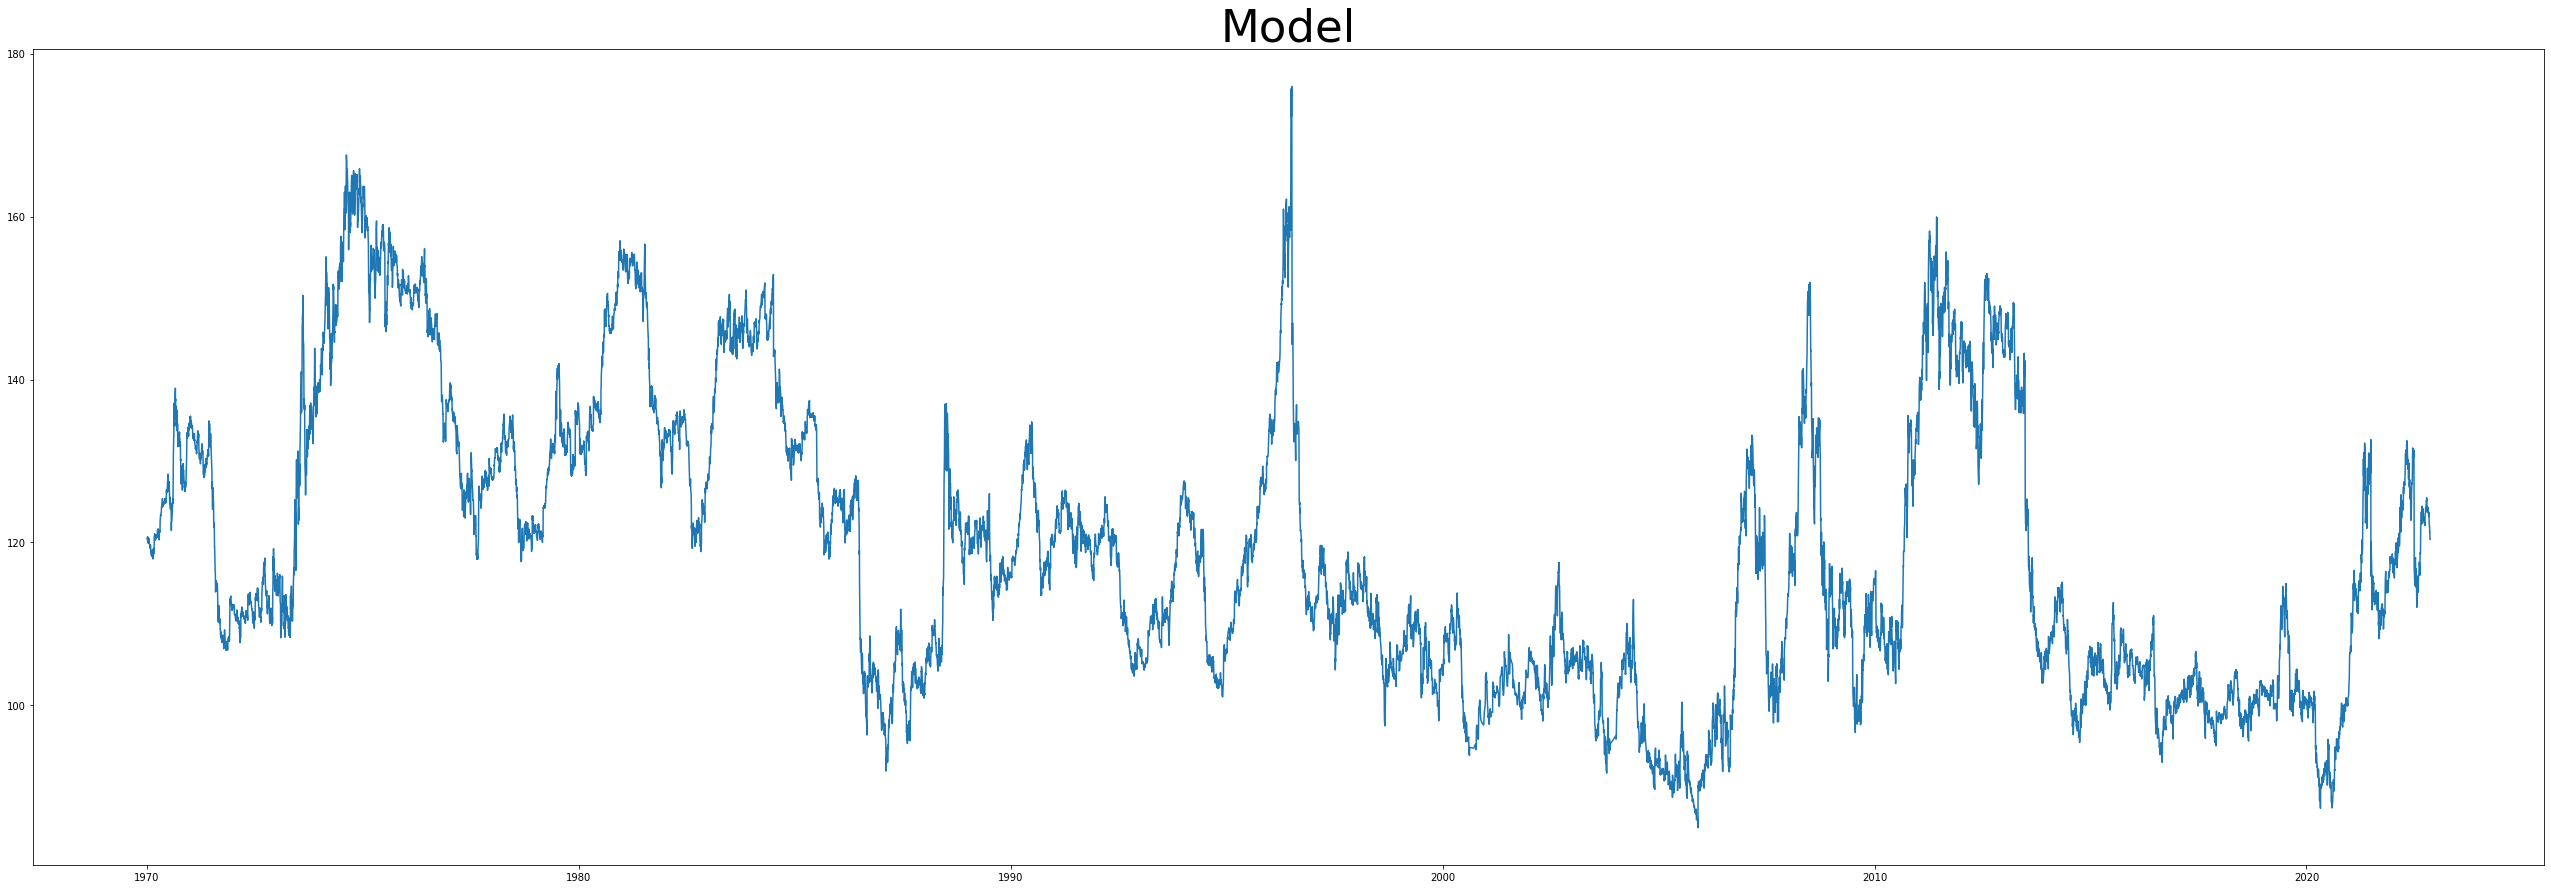

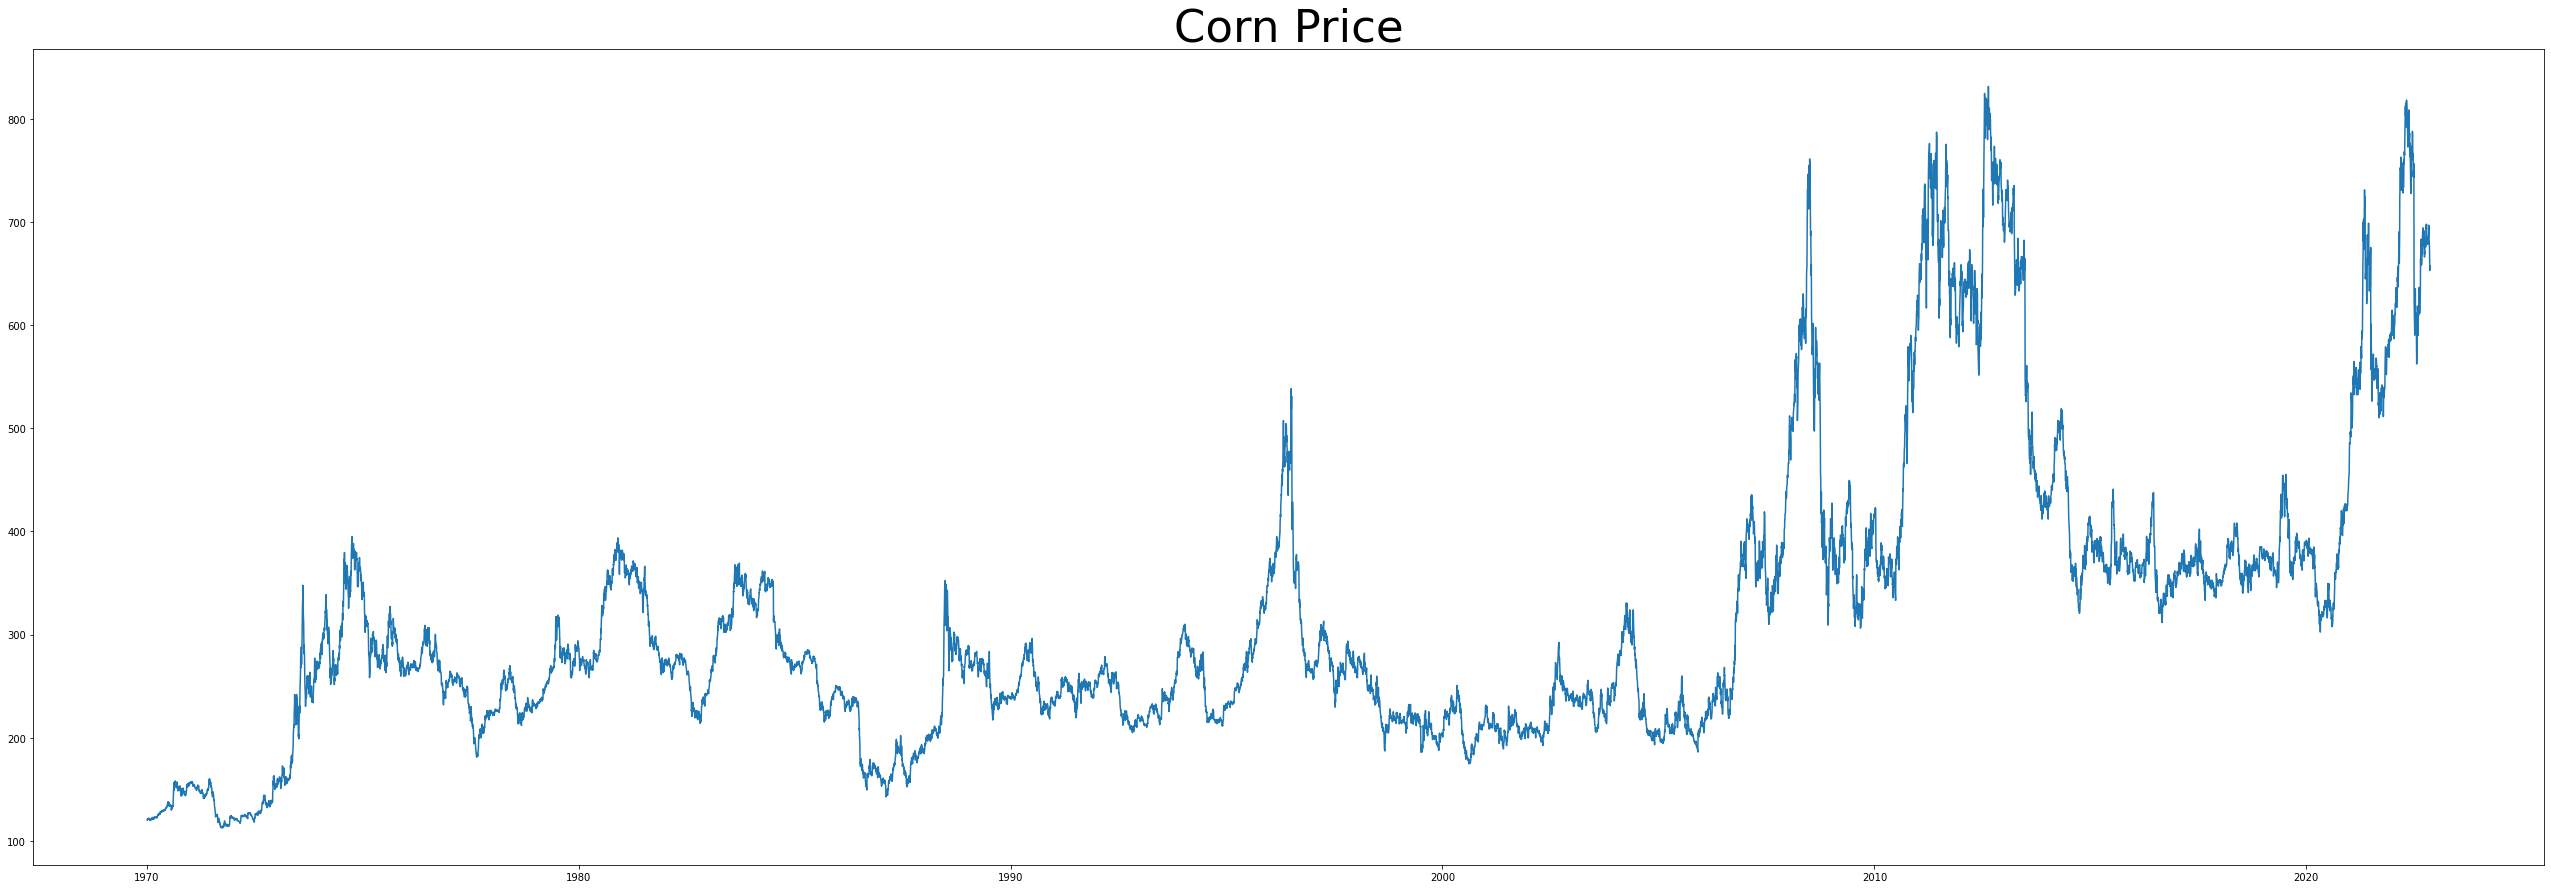

In [30]:
plt.figure(figsize=(45,15))
plt.title('Model',fontsize=45)
plt.plot(np.exp(forecast.cumsum())*pca_df['ZC1!, CBOT: Close'][0])
plt.show()

plt.figure(figsize=(45,15))
plt.title('Corn Price',fontsize=45)
plt.plot(pca_df['ZC1!, CBOT: Close'])
plt.show()

In [31]:
pca_df['ZC1!, CBOT: Close'] - np.exp(forecast.cumsum())*pca_df['ZC1!, CBOT: Close'][0]

time
1970-01-05 01:00:00+00:00           NaN
1970-01-06 01:00:00+00:00      0.178541
1970-01-07 01:00:00+00:00      0.758257
1970-01-08 01:00:00+00:00      1.051807
1970-01-09 01:00:00+00:00      0.706149
                                ...    
2022-11-07 01:00:00+00:00    553.624078
2022-11-08 01:00:00+00:00    545.506919
2022-11-09 01:00:00+00:00    542.746315
2022-11-10 01:00:00+00:00    532.616886
2022-11-11 01:00:00+00:00    537.125000
Length: 13298, dtype: float64

In [32]:
pca_df['ZC1!, CBOT: Close'][10000:]

time
2009-10-13 00:00:00+00:00    381.75
2009-10-14 00:00:00+00:00    383.00
2009-10-15 00:00:00+00:00    373.00
2009-10-16 00:00:00+00:00    372.00
2009-10-19 00:00:00+00:00    386.25
                              ...  
2022-11-07 01:00:00+00:00    675.50
2022-11-08 01:00:00+00:00    666.75
2022-11-09 01:00:00+00:00    664.00
2022-11-10 01:00:00+00:00    653.00
2022-11-11 01:00:00+00:00    657.50
Name: ZC1!, CBOT: Close, Length: 3298, dtype: float64

# Modelling code

In [33]:
pca_event = {

    'nComp':4,

}



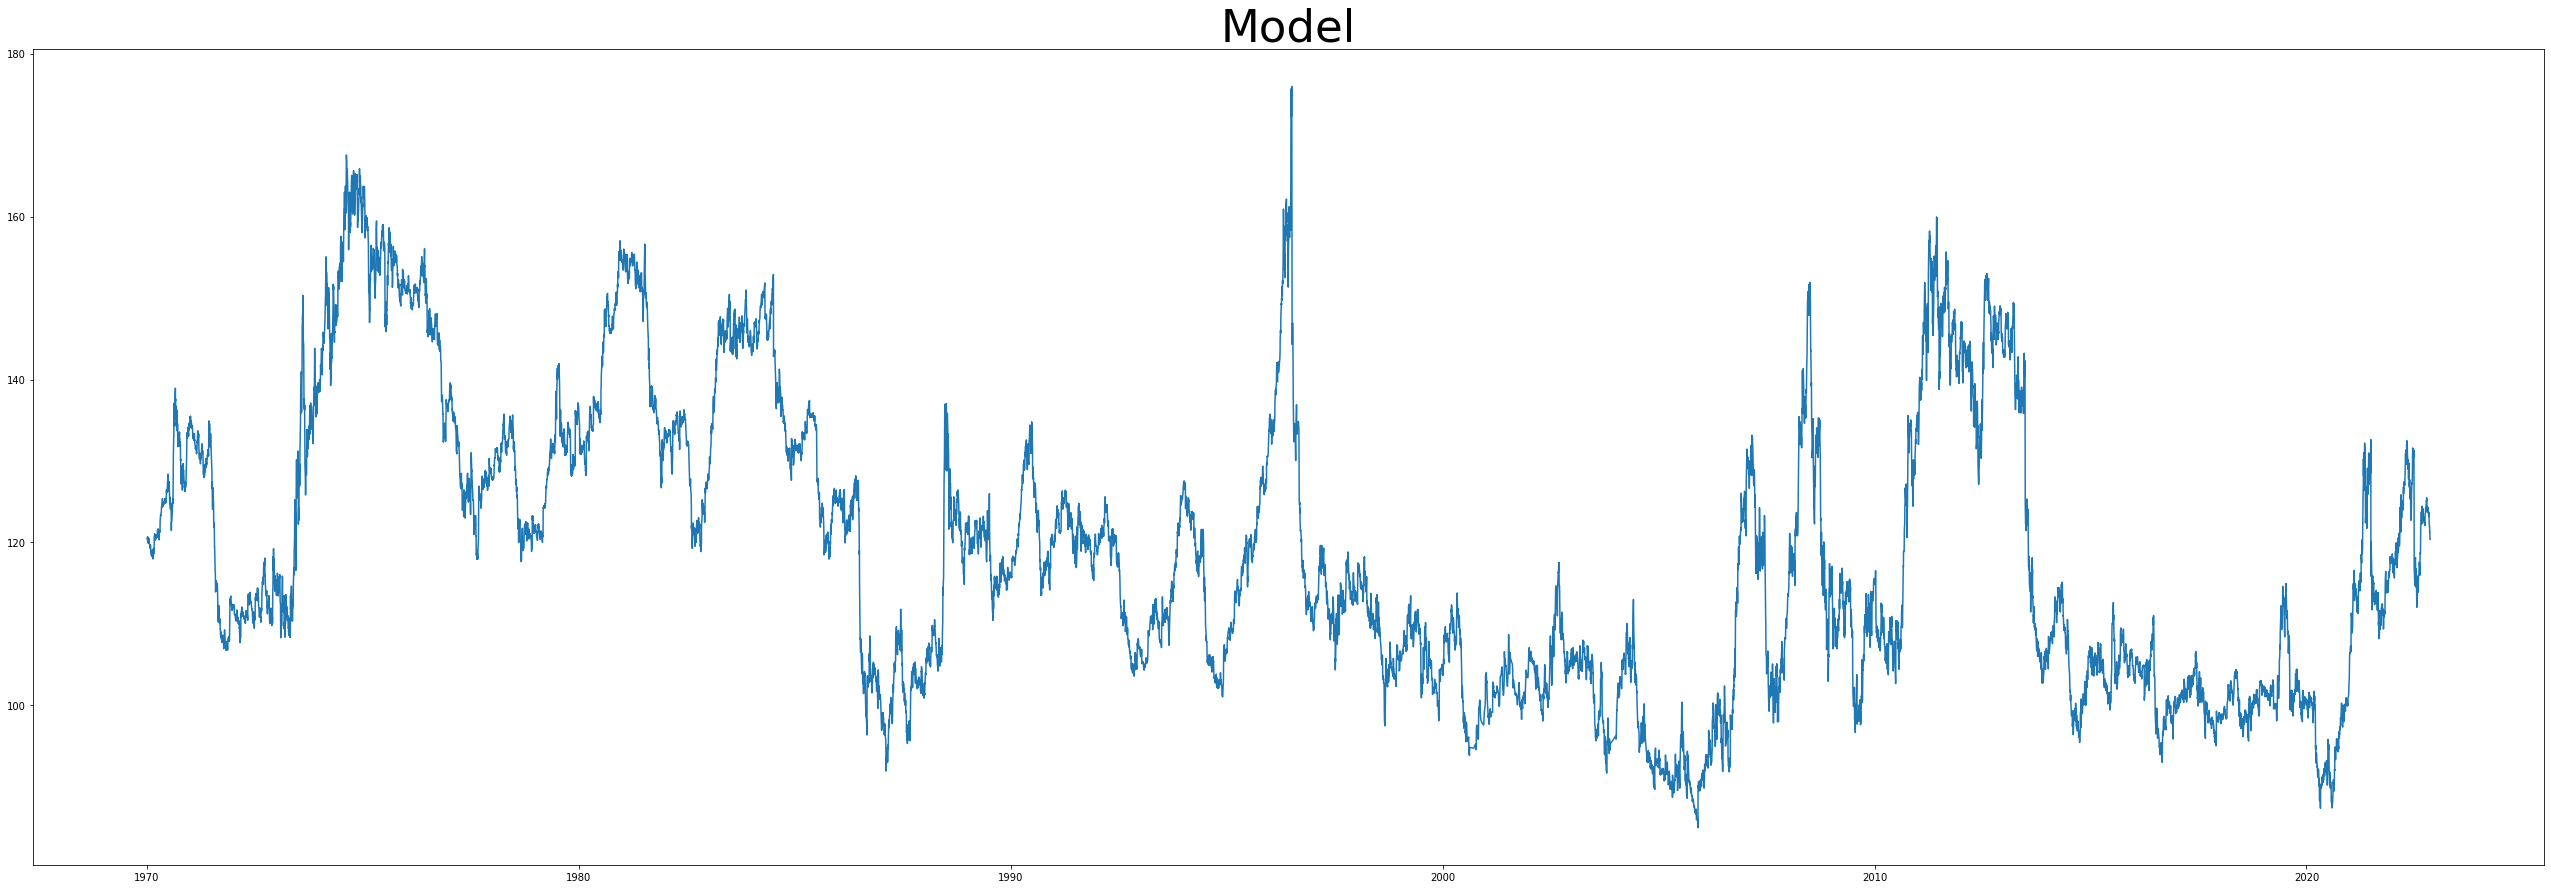

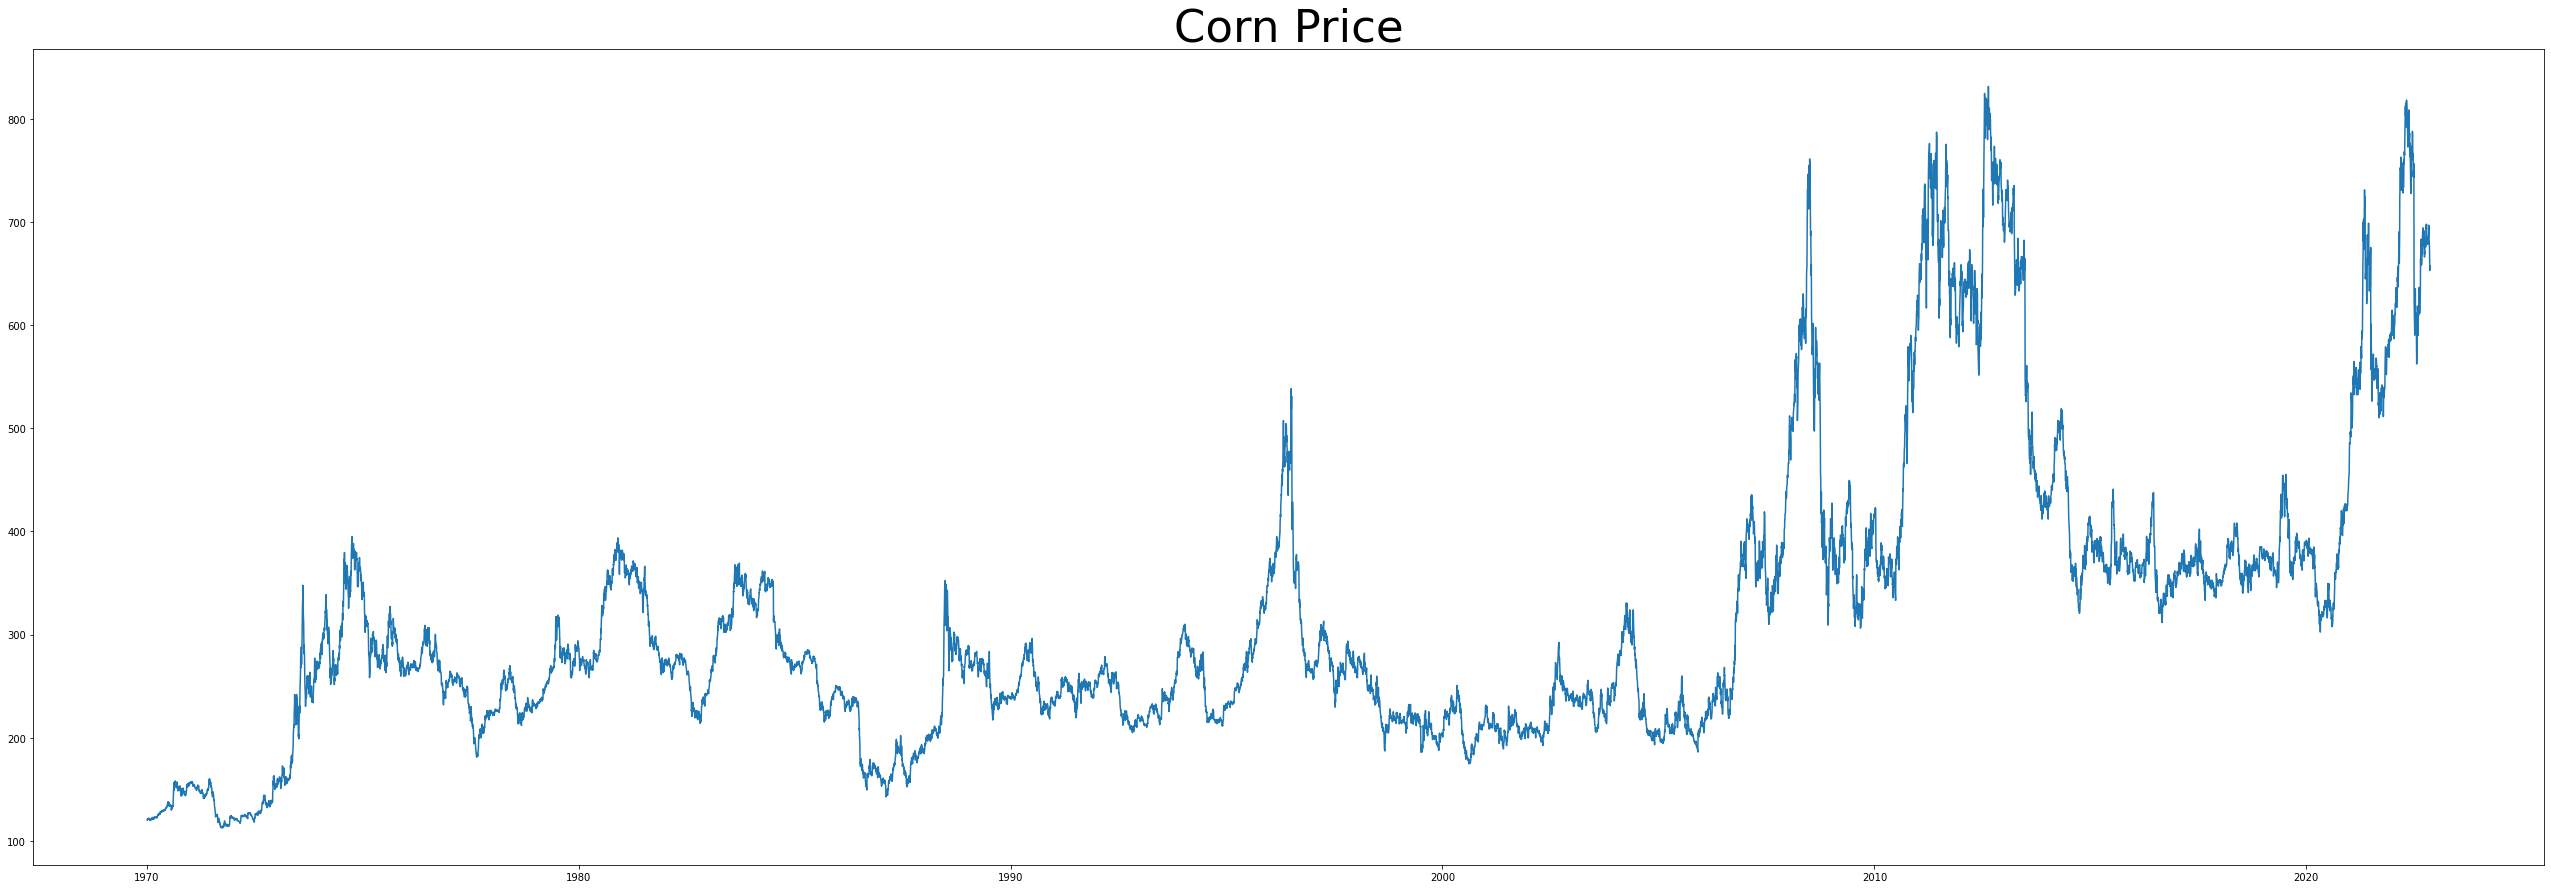

In [34]:

def pca_model(pca_event):
    pca_logDiff_df = np.log(pca_df).diff(1).dropna(axis=0).fillna(0)
    pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

    cacheModels = {

        'nComps':4,

    }

    forecast=0
    for i in range(0,cacheModels['nComps']):
        forecast+= pc.eigenvecs['eigenvec_'+str(i)][0]*pc.factors['comp_'+str(i)]

    return forecast

fcast = pca_model(pca_event)

# Plotting Projections
plt.figure(figsize=(45,15))

plt.title('Model',fontsize=45)s
plt.plot(np.exp(forecast.cumsum())*pca_df['ZC1!, CBOT: Close'][0])

plt.show()

# Plotting Corn Price
plt.figure(figsize=(45,15))

plt.title('Corn Price',fontsize=45)
plt.plot(pca_df['ZC1!, CBOT: Close'])

plt.show()

# Seasonal PCA Residuals

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
pca_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\commodities\soft_commodities\grains\pca_grains\CBOT_DL_GRAIN, 1D.csv',index_col='time', parse_dates=True)

pca_df.head()

,"ZC1!, CBOT: Close","ZS1!, CBOT: Close","ZM1!, CBOT: Close","ZL1!, CBOT: Close","ZW1!, CBOT: Close"
time,,,,,
1970-01-05 01:00:00+00:00,120.375,251.250,74.1,8.67,145.375
1970-01-06 01:00:00+00:00,120.625,252.000,73.0,8.84,146.000
1970-01-07 01:00:00+00:00,121.125,253.250,73.2,9.18,146.875
1970-01-08 01:00:00+00:00,121.750,253.750,73.6,9.24,146.750
1970-01-09 01:00:00+00:00,120.875,253.375,74.0,9.25,145.625


In [37]:
pca_logDiff_df = np.log(pca_df).diff(1).dropna(axis=0).fillna(0)

pca_logDiff_df.head()

,"ZC1!, CBOT: Close","ZS1!, CBOT: Close","ZM1!, CBOT: Close","ZL1!, CBOT: Close","ZW1!, CBOT: Close"
time,,,,,
1970-01-06 01:00:00+00:00,0.002075,0.002981,-0.014956,0.019418,0.004290
1970-01-07 01:00:00+00:00,0.004137,0.004948,0.002736,0.037740,0.005975
1970-01-08 01:00:00+00:00,0.005147,0.001972,0.005450,0.006515,-0.000851
1970-01-09 01:00:00+00:00,-0.007213,-0.001479,0.005420,0.001082,-0.007696
1970-01-12 01:00:00+00:00,0.003098,0.004430,0.018742,0.022449,-0.008621


In [38]:
# pc = PCA(pca_logDiff_df,ncomp=4)

In [39]:

cacheModels = {

    'nComps':4,

}

In [40]:
decompose = []
for i, column in enumerate(pca_logDiff_df.columns):
    res = seasonal_decompose(pca_logDiff_df[column], model="additive",period=252)
    decompose.append(res.resid)



In [41]:
decompose[0].dropna(axis=0)

time
1970-07-07 00:00:00+00:00    0.005965
1970-07-08 00:00:00+00:00    0.018291
1970-07-09 00:00:00+00:00   -0.004593
1970-07-10 00:00:00+00:00    0.006628
1970-07-13 00:00:00+00:00   -0.016546
                               ...   
2022-05-09 00:00:00+00:00   -0.018049
2022-05-10 00:00:00+00:00    0.002415
2022-05-11 00:00:00+00:00    0.020587
2022-05-12 00:00:00+00:00    0.000737
2022-05-13 00:00:00+00:00   -0.008778
Name: resid, Length: 12880, dtype: float64

In [42]:
pca_resid_df = pd.DataFrame(decompose).T.dropna(axis=0)

In [43]:
pca_resid_df.head().dropna(axis=0)

,resid,resid,resid,resid,resid
time,,,,,
1970-07-07 00:00:00+00:00,0.005965,0.001600,0.007600,0.001578,0.008065
1970-07-08 00:00:00+00:00,0.018291,0.023460,0.030788,0.032586,0.014945
1970-07-09 00:00:00+00:00,-0.004593,-0.017298,-0.016264,-0.019733,-0.000564
1970-07-10 00:00:00+00:00,0.006628,-0.003730,0.007530,0.001008,-0.001096
1970-07-13 00:00:00+00:00,-0.016546,0.033588,0.032364,0.028588,0.007852


In [44]:
pca_resid_df.to_csv('resid.csv')

In [45]:
df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\exploratory_analysis\pca\resid.csv',index_col='time', parse_dates=True)

In [46]:
def pca_model(pca_event):
    pca_logDiff_df = np.log(df).diff(1).dropna(axis=0).fillna(0)
    pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

    cacheModels = {

        'nComps':4,

    }

    forecast=0
    for i in range(0,cacheModels['nComps']):
        forecast+= pc.eigenvecs['eigenvec_'+str(i)][0]*pc.factors['comp_'+str(i)]

    return forecast

pca_event = {

    'nComp':4,

}



In [47]:
fcast = pca_model(pca_event)


In [48]:
print(fcast)

time
1970-07-08 00:00:00+00:00    0.011794
1970-09-23 00:00:00+00:00   -0.133407
1970-10-23 00:00:00+00:00    0.068579
1971-05-20 00:00:00+00:00    0.035716
1971-05-21 00:00:00+00:00    0.046062
                               ...   
2021-10-15 00:00:00+00:00    0.035944
2021-11-12 01:00:00+00:00    0.047841
2021-12-22 01:00:00+00:00   -0.019860
2022-02-23 01:00:00+00:00   -0.081377
2022-03-01 01:00:00+00:00   -0.002260
Name: comp_0, Length: 412, dtype: float64


In [49]:
fcast.head()

time
1970-07-08 00:00:00+00:00    0.011794
1970-09-23 00:00:00+00:00   -0.133407
1970-10-23 00:00:00+00:00    0.068579
1971-05-20 00:00:00+00:00    0.035716
1971-05-21 00:00:00+00:00    0.046062
Name: comp_0, dtype: float64

In [50]:
len(fcast)

412

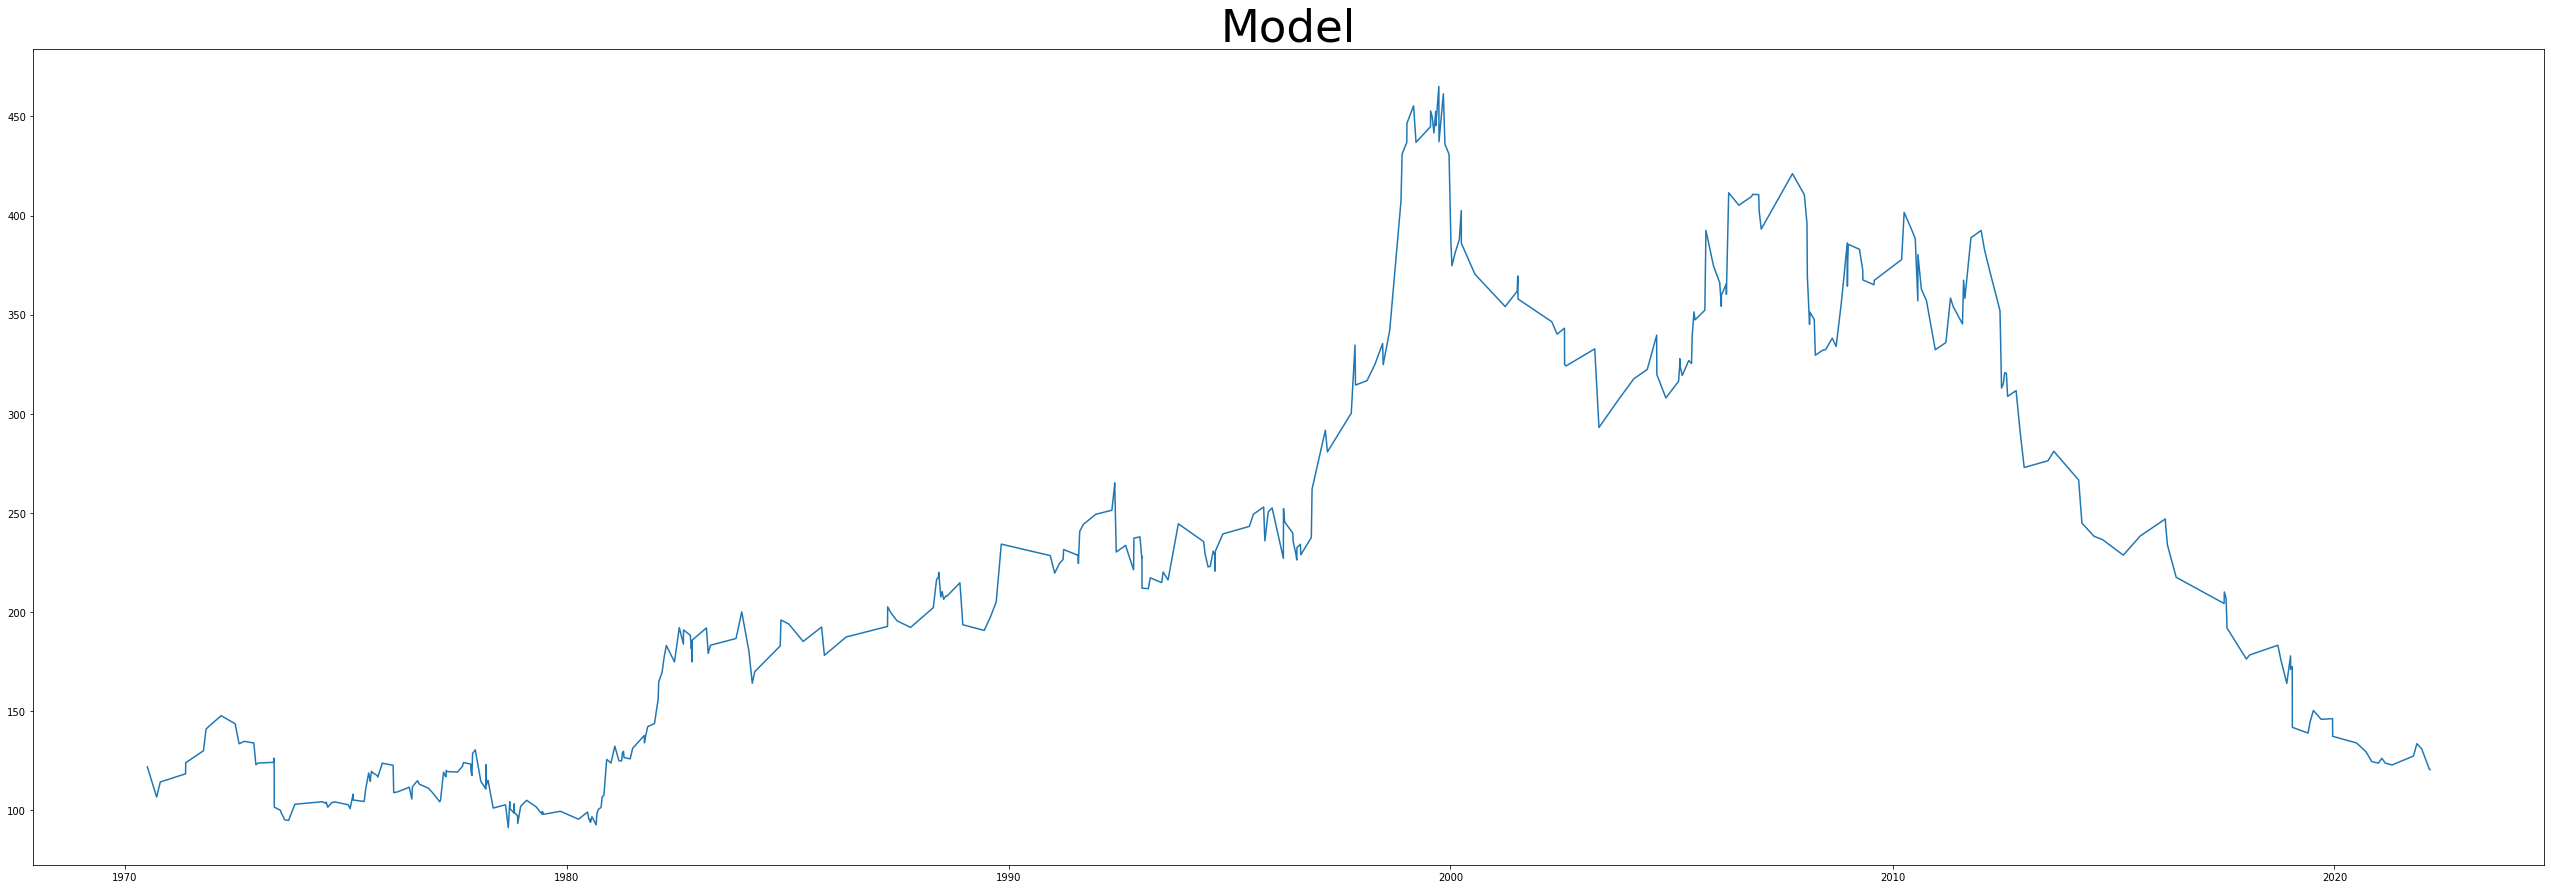

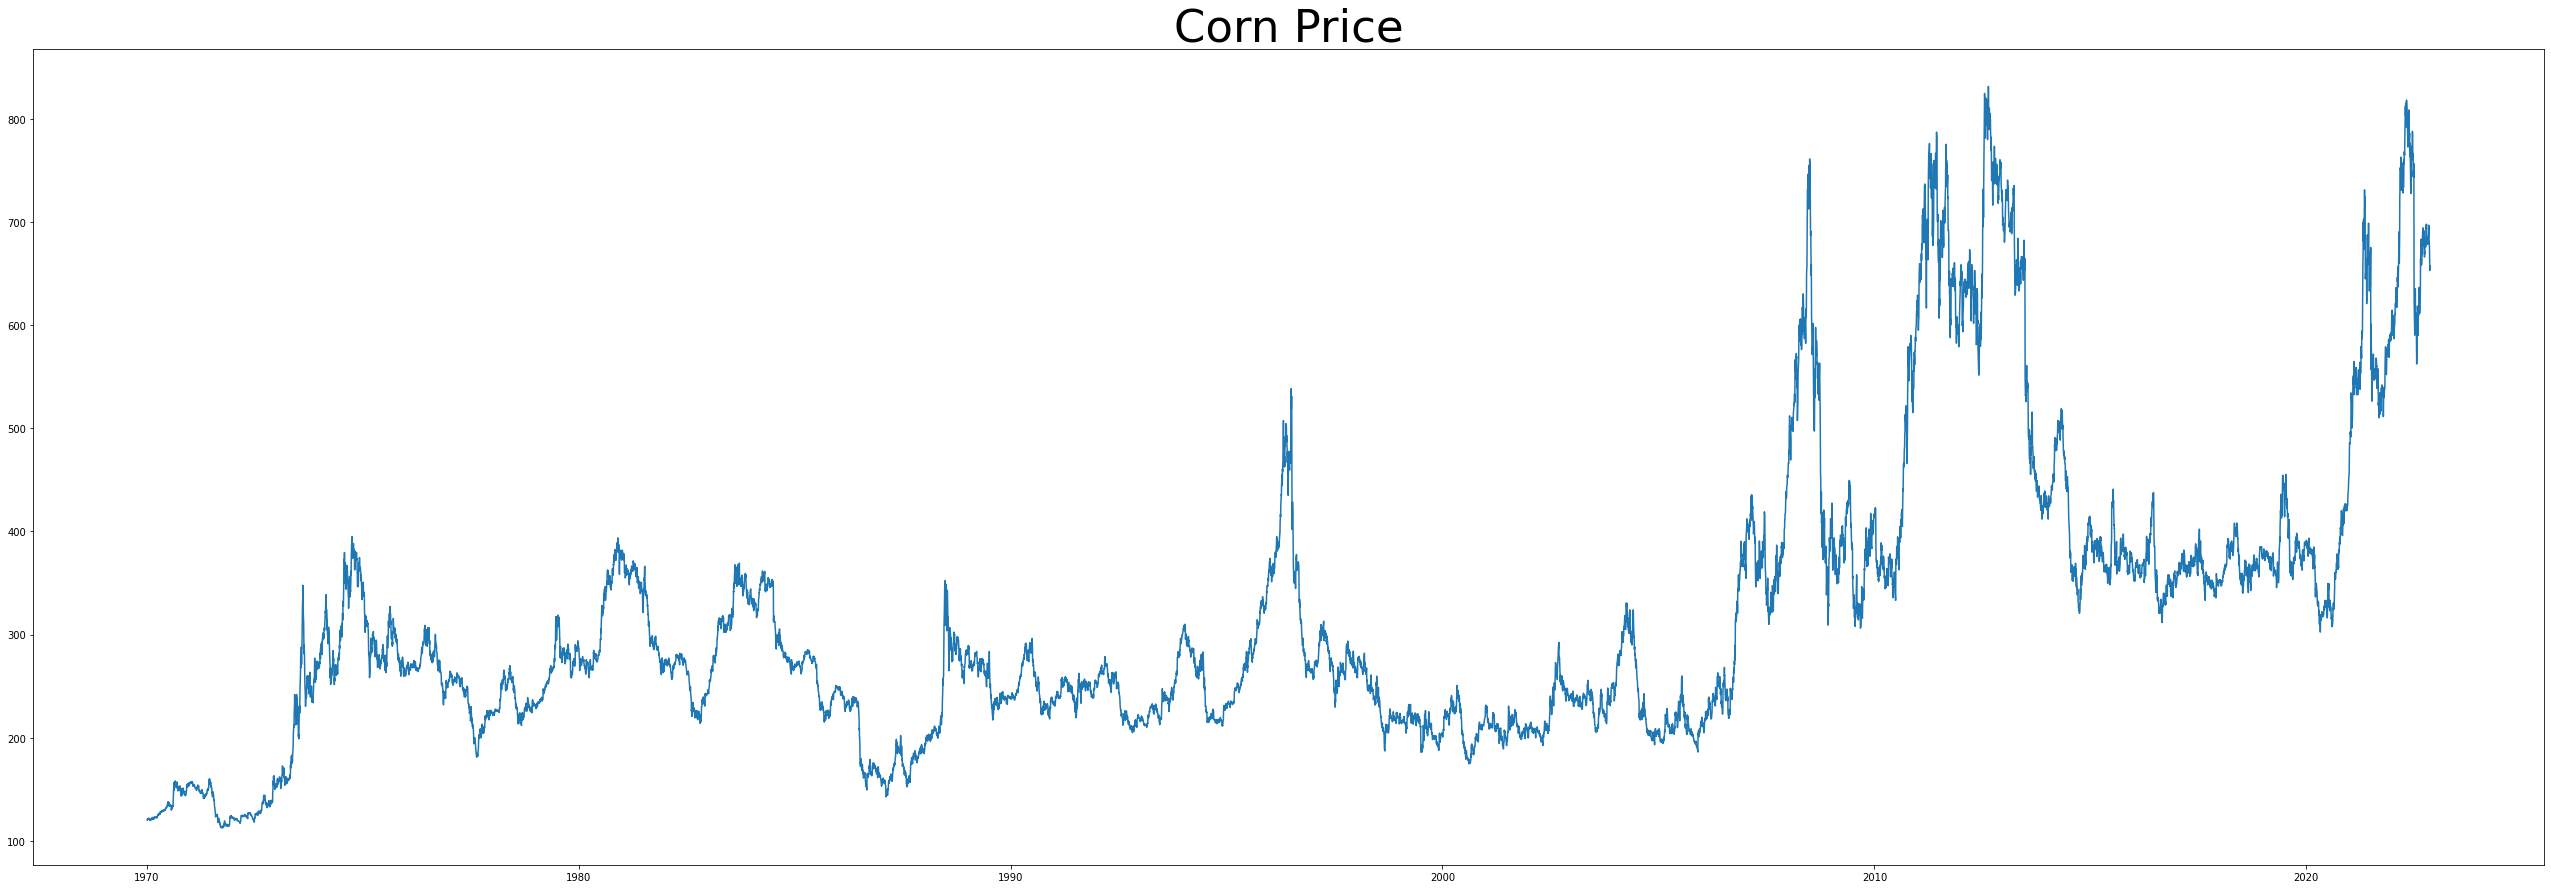

In [51]:

# Plotting Projections
plt.figure(figsize=(45,15))

plt.title('Model',fontsize=45)
plt.plot(np.exp(fcast.cumsum())*pca_df['ZC1!, CBOT: Close'][0])

plt.show()

# Plotting Corn Price
plt.figure(figsize=(45,15))

plt.title('Corn Price',fontsize=45)
plt.plot(pca_df['ZC1!, CBOT: Close'])

plt.show()

In [52]:
pca_logDiff_df = np.log(pca_resid_df)
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

cacheModels = {

    'nComps':4,

}

forecast=0
for i in range(0,cacheModels['nComps']):
    forecast+= pc.eigenvecs['eigenvec_'+str(i)][0]*pc.factors['comp_'+str(i)]


ValueError: data contains non-finite values (inf, NaN). You should drop these values or
use one of the methods for adjusting data for missing-values.